## Part 1

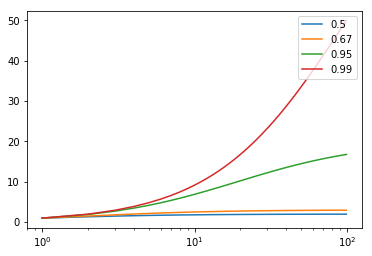

In [4]:
"""
Created on Fri Apr 14 18:38:46 2017
@author: kevin
Part 1
"""
import matplotlib.pyplot as plt
num_processors = range(1,100)
proportions = [0.5, 0.67,  0.95, 0.99]
colors = ['r','b','g','k']
def speedup(p,n):#input proportion and number of processors
    speedup = []
    for processors in n:
        speedup.append(1/((1-p) + p/processors))#value of speed up
    return speedup

for idx, proportion in enumerate(proportions):
    plt.semilogx(num_processors,speedup(proportion,num_processors),label=str(proportion))
    
plt.legend(loc='upper right')
plt.show()

## Part 2

### PARALLEL USING INITIALIZATION

calculation: 17.646618127822876 s


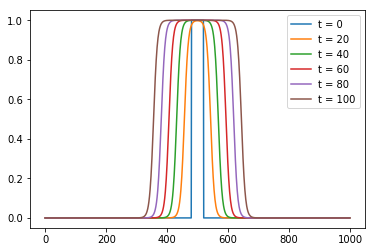

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May  3 13:15:07 2018

@author: kevin
"""

'''PARALLEL USING INITIALIZATION'''
from matplotlib import pyplot
import numpy
import time
import multiprocessing
import sys
start = time.time()

# initial conditions
size = 1000
num_processors = 2

y = multiprocessing.Array('d', 1000, lock=False)
new_y = multiprocessing.Array('d', 1000, lock=False)
y[480:520] = [1] * 40

#break up data, start-end
start_end = []
chunk_size = size//num_processors
for i in range(num_processors):
    start_end.append([i*chunk_size,chunk_size*(i+1)])

def init_process(y_to_share, new_y_to_share):
    global y, new_y
    y = y_to_share
    new_y = new_y_to_share

# parameters
D = 20         # diffusion constant/dx^2
alpha = 0.3    # threshold

# time-step
dt = 0.01

# our rule for reaction-diffusion
def advance(start_end):
    start = start_end[0]
    end = start_end[1]
    #print("hello, I am worker: {}".format(multiprocessing.current_process()))
    #print("start:{} end:{}".format(start,end))
    #sys.stdout.flush()
    #new_y[:] = y[:]
    for j in range(start,end):
        # diffusion via forward Euler
        new_y[j] += dt * (D * (y[j - 1] - 2 * y[j] + y[(j + 1) % size]))

        # reaction via forward Euler
        new_y[j] += dt * -y[j] * (1 - y[j]) * (alpha - y[j])



#initialize our processing pool
process_pool = multiprocessing.Pool(
                       processes=num_processors,
                       initializer=init_process,
                       initargs=(y, new_y))

#pool = multiprocessing.Pool(processes=num_processors) #instantiate pool
# advance through t is at least 100; plot every 20
new_y[:] = y[:]
for t in numpy.arange(0, 100 + dt, dt):
    if t % 20 == 0:
        pyplot.plot(y, label='t = %g' % t)
    process_pool.map(advance, start_end)
    y[:] = new_y[:]#[item for sublist in result for item in sublist]

print('calculation: {} s'.format(time.time() - start))

pyplot.legend()
pyplot.show()

### PARALLEL NOT USING INITIALIZATION

calculation: 20.03420400619507 s


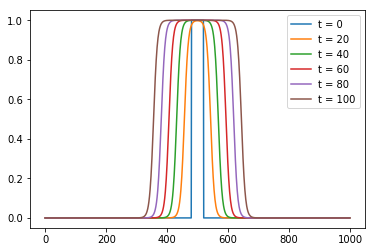

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May  3 13:16:08 2018

@author: kevin
"""

'''PARALLEL, NOT USING INITIALIZATION'''
from matplotlib import pyplot
import numpy
import time
from multiprocessing import Pool, Array
import multiprocessing
import sys
start = time.time()

# initial conditions
size = 1000
num_processors = 2

y = multiprocessing.Array('d', 1000, lock=False)
y[480:520] = [1] * 40

#break up data, start-end
start_end = []
chunk_size = size//num_processors
for i in range(num_processors):
    start_end.append([i*chunk_size,chunk_size*(i+1)])

# parameters
D = 20         # diffusion constant/dx^2
alpha = 0.3    # threshold

# time-step
dt = 0.01

# our rule for reaction-diffusion
def advance(start_end):
    start = start_end[0]
    end = start_end[1]
    #print("hello, I am worker: {}".format(multiprocessing.current_process()))
    #print("start:{} end:{}".format(start,end))
    #sys.stdout.flush()
    new_y = list(y)
    for j in range(start,end):
        # diffusion via forward Euler
        new_y[j] += dt * (D * (y[j - 1] - 2 * y[j] + y[(j + 1) % size]))

        # reaction via forward Euler
        new_y[j] += dt * -y[j] * (1 - y[j]) * (alpha - y[j])

    return new_y[start:end]


pool = multiprocessing.Pool(processes=num_processors) #instantiate pool
# advance through t is at least 100; plot every 20
for t in numpy.arange(0, 100 + dt, dt):
    if t % 20 == 0:
        pyplot.plot(y, label='t = %g' % t)
    result = pool.map(advance, start_end)
    y[:] = [item for sublist in result for item in sublist]

print('calculation: {} s'.format(time.time() - start))

pyplot.legend()
pyplot.show()

### Original

7.757896661758423


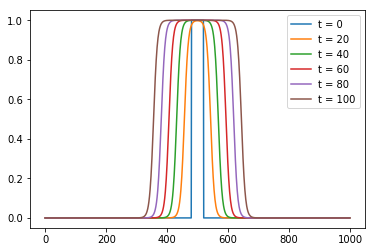

In [2]:
"""
Created on Fri Apr 14 21:55:16 2017
@author: kevin
NON-PARALLEL
DO NOT WRITEEEEEE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
"""

from matplotlib import pyplot
import time
start = time.time()
# initial conditions
y = [0] * 1000
y[480:520] = [1] * 40

# time-step
dt = 0.01
# our rule for reaction-diffusion
def advance(dt):
	global y
	n = len(y)
	new_y = list(y)
	for j in range(n):
		new_y[j] += dt * (20 * (y[j - 1] - 2 * y[j] + y[(j + 1) % n])
						   - y[j] * (1 - y[j]) * (0.3 - y[j]))
	y = new_y

# advance through t (t = i * dt) is at least 100; plot
# every 20
i = 0
while i * dt <= 100:
	if i * dt % 20 == 0:
		pyplot.plot(y, label='t = %g' % (i * dt))
	advance(dt)
	i += 1
	#print (i * dt)
end = time.time()

elapsed = end-start
print (elapsed)
pyplot.legend()
pyplot.show()